# Import Libraries

In [1]:
pip install --upgrade nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.9 MB/s eta 0:00:0000:010:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.9.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install contractions


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import re
import emoji
import pandas as pd 
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from keras.optimizers import Adam
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec

import seaborn as sns
import contractions
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Download NLTK resources if not already done
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Read the dataset 

In [5]:
column_names = ["target", "id", "date", "flag", "user", "text"]

# Read the CSV file with specified column names
df = pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", 
                 encoding="ISO-8859-1", names=column_names)

In [6]:
df.head (10)

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


# Data Cleaning and preprocessing 

### we only need two columns "target" and "text"

In [7]:
df=df[['text','target']]
df.sample(5)

,text,target
910845,loves her mummy with everything she has. alway...,4
510724,Morningtime again,0
1078717,Playing with my mark. makeup and jammin' to Ta...,4
310981,@AceyBongos Erm... and how about the rest of E...,0
123388,GAAA another sleepless night,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1600000 non-null  object
 1   target  1600000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [9]:
df.shape

(1600000, 2)

In [10]:
df.isna().sum()

text      0
target    0
dtype: int64

In [11]:
df.duplicated().sum()

16309

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(1583691, 2)

In [14]:
df['target'].unique()

array([0, 4])

In [15]:
df['target'].value_counts()

target
4    793506
0    790185
Name: count, dtype: int64

### As we know in this data set that the positive is "4" and the negative is "0"

In [16]:
# making 1 for positive instead of 4
df['target'][df['target']==4]=1

In [17]:
df.sample(5)

,text,target
1058697,"Wow, #ff thx to @MonaLockedIn @RHHR @lyndalipp...",1
43763,Everyones ignoring me tonight sawwy guyszs,0
729119,Wishes her stomach was feeling better,0
130025,assignment.,0
406791,i hatee ayesshaa she suckkss,0


In [18]:
# Making Text Lowercase
df['text']=df['text'].str.lower()

In [19]:
df.sample(5)

,text,target
1102497,@stevemekler steve you got new youtube messages,1
1280170,@calilewis whaat?? :o hotdog in pizza? please ...,1
422238,at 11:39 she said: we have nothing to talk abo...,0
1371513,goodnight! sweet dreams,1
959096,@realworldmom thanks,1


## Remove URLs

In [20]:
# Remove URLs
df['text'] = df['text'].replace(r'http\S+|www\S+|https\S+', '', regex=True)


## Remove Mentions and Hashtags

In [21]:
# Remove Mentions and Hashtags
df['text'] = df['text'].replace(r'@\w+|#\w+', '', regex=True)


## Remove Special Characters and Punctuation

In [22]:
# Remove Special Characters and Punctuation
df['text'] = df['text'].replace(r'[^A-Za-z0-9\s]', '', regex=True)


## Remove Numbers

In [23]:
# Remove Numbers
df['text'] = df['text'].replace(r'\d+', '', regex=True)


## Function to expand contractions in text

In [24]:
# Function to expand contractions in text

def expand_contractions(text):
    return contractions.fix(text)


df['text'] = df['text'].apply(expand_contractions)

## Remove Stopwords

In [25]:
# Remove Stopwords
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


## Lemmatization


In [26]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


## Handling Emoticons and Emojis


In [27]:
# Handling Emoticons and Emojis
df['text'] = df['text'].apply(lambda x: emoji.demojize(x))


## Remove Repeated Characters Reduce repeated characters, such as "sooooo happy" to "so happy."


In [28]:
#Remove Repeated Characters Reduce repeated characters, such as "sooooo happy" to "so happy."
df['text'] = df['text'].apply(lambda x: re.sub(r'(.)\1+', r'\1\1', x))


In [29]:
df.sample(20)

,text,target
1058974,cool bag glad san antonio pretty cool place like,1
1427645,thank much sir,1
1349288,lean mean emmabean early day,1
1066671,duane ready go bonfire robs birthday fun,1
425935,aww poor little thing hope find,0
4109,going flight hellback cattle class lot screami...,0
778419,wrong actually want lot thing,0
1031846,good morning,1
63880,kid seem flu flu pray feeling good week nights...,0
235132,stop making ad shiny tweetie come point consid...,0


In [30]:
df['tweet_length'] = df['text'].apply(len)

In [31]:
df['tweet_length'].value_counts()

tweet_length
23     26948
21     26869
24     26741
26     26686
20     26600
       ...  
135        2
139        1
141        1
168        1
172        1
Name: count, Length: 142, dtype: int64

In [32]:
df.sample(10)

,text,target,tweet_length
378388,cannot wait tahj thinggn twitssay prayer xoxo ...,0,61
1088470,hahaha betul betul email kat saffa phone rara ...,1,88
1546451,got proof skaar gorgeous book,1,29
673017,wow best dinner ever pechanga loved bad got br...,0,85
653562,finally weekend tonight date mona elit one str...,0,88
1452478,kiara hall yes nice ring say,1,28
881617,enjoy sun often say uk,1,22
145649,preparing trial start next tuesday holiday wee...,0,50
1329137,,1,0
57850,know unfortunately one take,0,27


In [33]:
df.isna().sum()

text            0
target          0
tweet_length    0
dtype: int64

In [34]:
df.shape

(1583691, 3)

In [35]:
df = df[df['tweet_length'] > 0]

In [36]:
df.shape

(1574929, 3)

In [37]:
df.duplicated().sum()

102747

In [38]:
df.drop_duplicates(inplace=True)

In [39]:
df.shape

(1472182, 3)

# EDA

In [40]:
df.describe()

,target,tweet_length
count,1.472182e+06,1.472182e+06
mean,4.965962e-01,4.300489e+01
std,4.999886e-01,2.234706e+01
min,0.000000e+00,1.000000e+00
25%,0.000000e+00,2.500000e+01
50%,0.000000e+00,4.000000e+01
75%,1.000000e+00,5.900000e+01
max,1.000000e+00,1.720000e+02


In [41]:
# Word Frequency Distribution
def word_frequency(df, text_column, num_words=20):
    all_words = ' '.join(df[text_column]).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(num_words)

In [42]:
word_frequency(df, 'text', num_words=20)

[('day', 98839),
 ('going', 86852),
 ('good', 83752),
 ('get', 83262),
 ('like', 77307),
 ('go', 75147),
 ('got', 68425),
 ('love', 66160),
 ('today', 64353),
 ('cannot', 63359),
 ('time', 62570),
 ('work', 62300),
 ('want', 61621),
 ('know', 54879),
 ('one', 54793),
 ('back', 54203),
 ('lol', 54035),
 ('really', 48949),
 ('see', 45191),
 ('well', 43640)]

In [43]:
# Plotting Word Clouds 
def plot_wordcloud(df, text_column):
    all_words = ' '.join(df[text_column])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


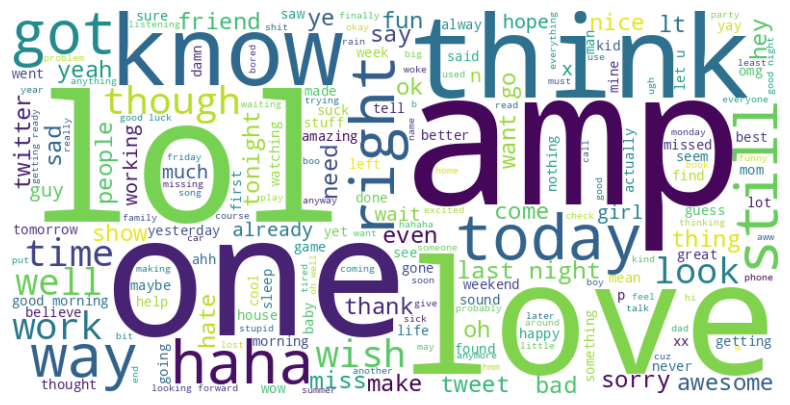

In [44]:
plot_wordcloud(df, 'text') 


In [45]:
# Tweet Length Distribution Plot
def plot_tweet_lengths(df):
    plt.figure(figsize=(8, 6))
    sns.histplot(df['tweet_length'], bins=20, kde=True)
    plt.title('Distribution of Tweet Lengths')
    plt.show()


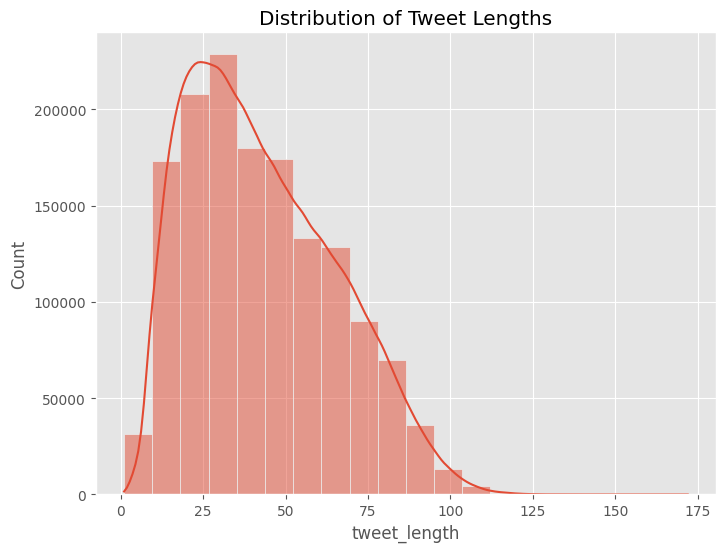

In [46]:
plot_tweet_lengths(df) 

In [47]:
#  Plotting Sentiment Distribution
def plot_sentiment_distribution(df, sentiment_column):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=sentiment_column, data=df)
    plt.title('Sentiment Distribution')
    plt.show()

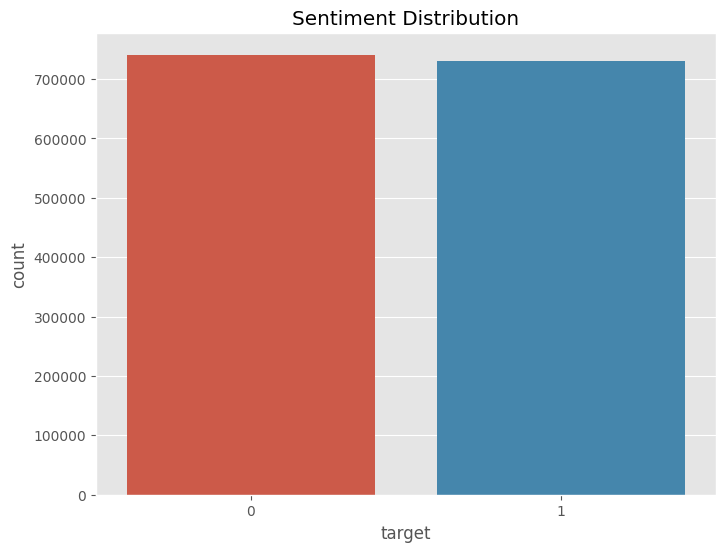

In [48]:
plot_sentiment_distribution(df, 'target')

In [49]:
df.sample(20)

,text,target,tweet_length
187131,good day faith,0,14
583346,know amp,0,8
1547243,true enjoy qi night,1,19
1240292,dj born runner think ran walked gene,1,36
200870,want see th jonas brother,0,25
1509766,hey lovebugjonas brother la la landdemi lovato,1,46
1391588,cheer meet hotel vin champagne,1,30
387627,come back philippine chance watch,0,33
370326,pussycat doll guess,0,19
927818,realized people think twitter pointless must r...,1,91


## Tokenization


In [50]:
tokenizer = RegexpTokenizer(r'\w+')
df['text'] = df['text'].apply(tokenizer.tokenize)

In [51]:
df.sample(20)

,text,target,tweet_length
233617,"[hate, nonstop, rain, went, nearest, grocery, ...",0,61
1168193,"[love, see, pic]",1,12
341823,"[ya, noticed, oki, love]",0,19
26135,"[got, amp, mom, makin, clean, room, ugh]",0,32
920107,"[interviewed, lot, gwapo, nung, nag, interview...",1,93
402146,"[shop, around, get, best, deal, garage, tomorr...",0,61
775487,"[boored, good, twitterville, sad, missed, whol...",0,73
1007187,"[thought, one, london, six, way, every, journe...",1,57
1416024,"[know, seen, twice, past, hour]",1,25
595598,"[heading, tuition, pm]",0,18


In [52]:
#df.to_csv('clean_data.csv', index=False)

In [54]:
X=df.text
y=df.target

In [85]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [86]:
sequences_matrix.shape

(1472182, 500)

In [87]:
X_train, X_temp, y_train, y_temp = train_test_split(sequences_matrix, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [88]:
# show the shape of data
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

print("Shape of X_train: ", X_val.shape)
print("Shape of X_test: ", y_train.shape)

print("Shape of X_train: ",y_test.shape)
print("Shape of X_test: ", y_val.shape)

Shape of X_train:  (1030527, 500)
Shape of X_test:  (220828, 500)
Shape of X_train:  (220827, 500)
Shape of X_test:  (1030527,)
Shape of X_train:  (220828,)
Shape of X_test:  (220827,)


# Model

In [89]:
#Defined tensorflow_based_model function for training tenforflow based model
def tensorflow_based_model(): 
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(500,50)(inputs) 
    layer = LSTM(64)(layer) 
    layer = Dense(256,name='FC1')(layer) 
    layer = Activation('relu')(layer) 
    layer = Dropout(0.5)(layer) 
    layer = Dense(1,name='out_layer')(layer) 
    layer = Activation('sigmoid')(layer) 
    model = Model(inputs=inputs,outputs=layer) 
    return model 

In [90]:
# Model compilation
model = tensorflow_based_model()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy']) 

In [91]:
model.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_3 (Embedding)         │ (None, 500, 50)        │        25,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC1 (Dense)                     │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ out_layer (Dense)               │ (None, 1)              │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,337 (278.66 KB)

 Trainable params: 71,337 (278.66 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
# Early stopping to stop training when validation loss doesn't improve
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [93]:
# Train the model
history=model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stop])
print('Training finished !!')

Epoch 1/20
16102/16102 ━━━━━━━━━━━━━━━━━━━━ 426s 26ms/step - accuracy: 0.7036 - loss: 0.5596 - val_accuracy: 0.7203 - val_loss: 0.5373
Epoch 2/20
16102/16102 ━━━━━━━━━━━━━━━━━━━━ 423s 26ms/step - accuracy: 0.7222 - loss: 0.5379 - val_accuracy: 0.7233 - val_loss: 0.5350
Epoch 3/20
16102/16102 ━━━━━━━━━━━━━━━━━━━━ 424s 26ms/step - accuracy: 0.7251 - loss: 0.5343 - val_accuracy: 0.7256 - val_loss: 0.5311
Epoch 4/20
16102/16102 ━━━━━━━━━━━━━━━━━━━━ 428s 27ms/step - accuracy: 0.7260 - loss: 0.5331 - val_accuracy: 0.7246 - val_loss: 0.5340
Epoch 5/20
16102/16102 ━━━━━━━━━━━━━━━━━━━━ 428s 27ms/step - accuracy: 0.7272 - loss: 0.5335 - val_accuracy: 0.7258 - val_loss: 0.5335
Epoch 6/20
16102/16102 ━━━━━━━━━━━━━━━━━━━━ 428s 27ms/step - accuracy: 0.7271 - loss: 0.5339 - val_accuracy: 0.7250 - val_loss: 0.5363
Training finished !!


# Evaluation

In [94]:
loss,acc = model.evaluate(X_test,y_test)

6901/6901 ━━━━━━━━━━━━━━━━━━━━ 65s 9ms/step - accuracy: 0.7254 - loss: 0.5352


In [95]:
print('Test Loss : {:0.2f}'.format(loss))
print('Test Accuracy: {:0.2f}'.format(acc))

Test Loss : 0.54
Test Accuracy: 0.72


In [98]:
y_pred = model.predict(X_test) #getting predictions on the trained model
y_pred = (y_pred > 0.5) 

6901/6901 ━━━━━━━━━━━━━━━━━━━━ 53s 8ms/step


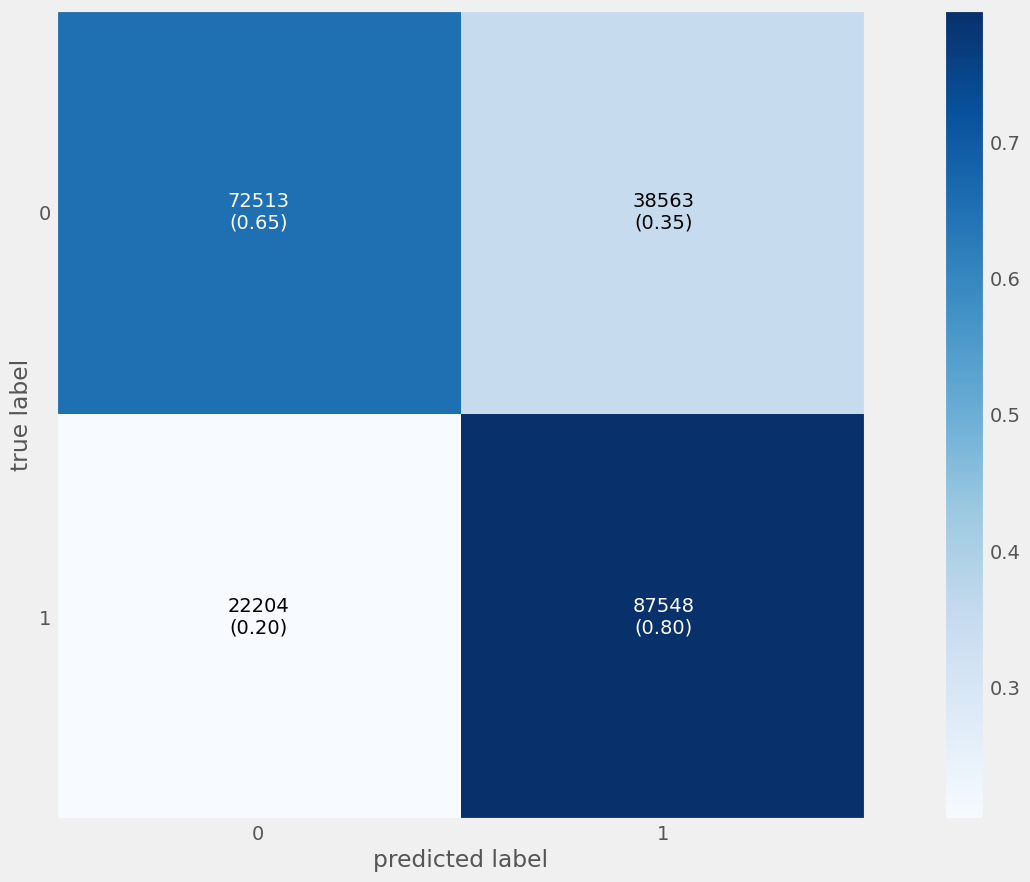

In [99]:
CR=confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(18, 10),show_absolute=True,show_normed=True, colorbar=True)
plt.show();

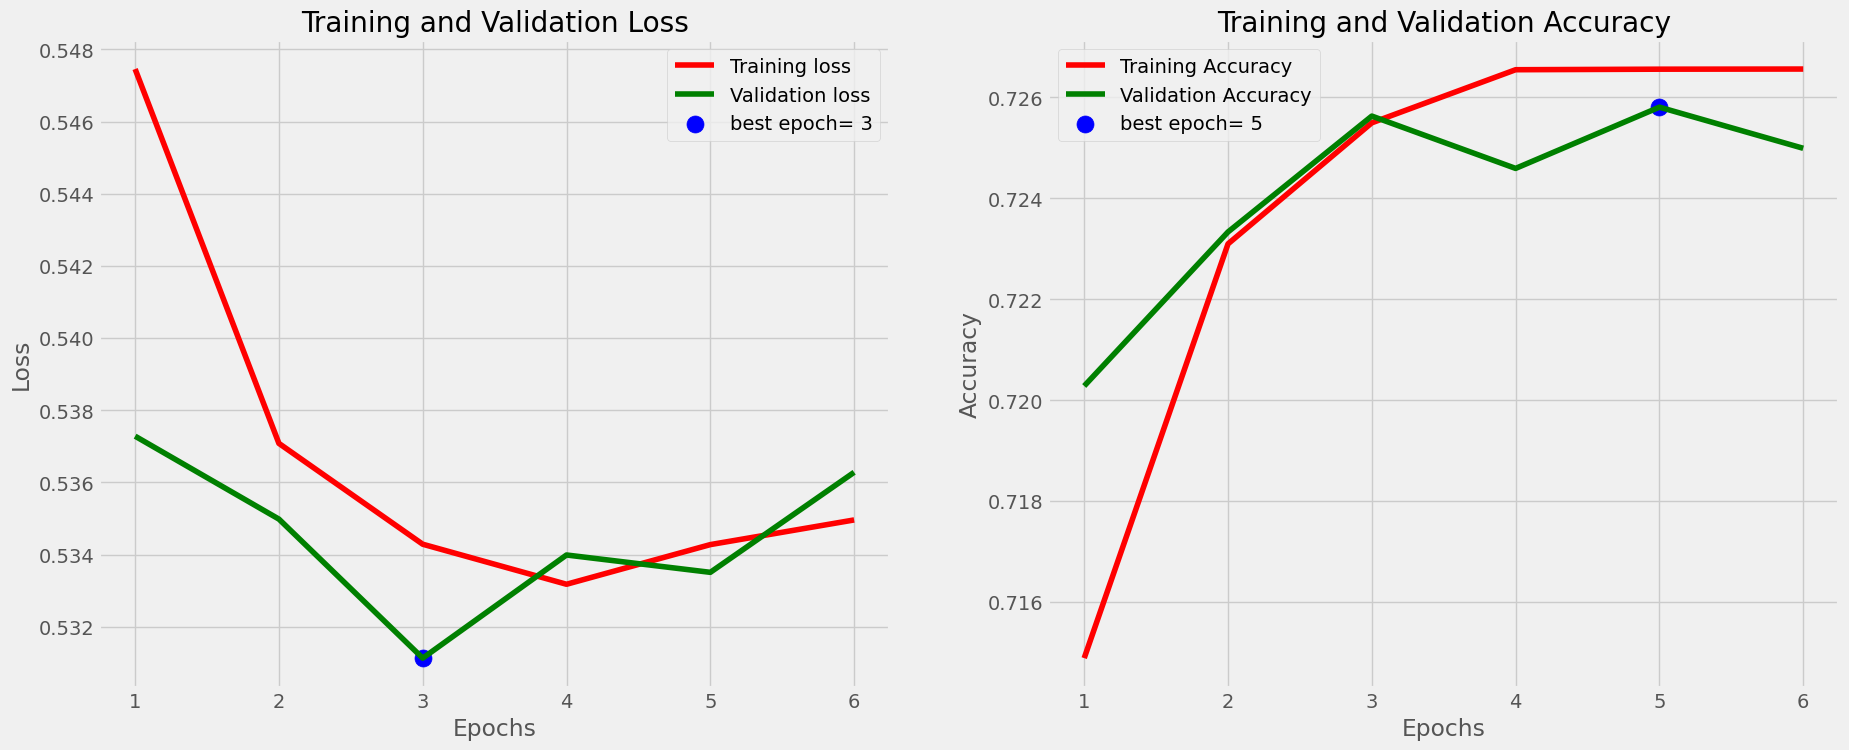

In [100]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

# test the model 

In [108]:
def predict(text, include_neutral=True):
    # Handle case when `text` is a single string
    if isinstance(text, str):
        text = [text]

    # Tokenize text
    sequences = tok.texts_to_sequences(text)
    sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)
    
    # Predict using the model
    score = model.predict(sequences_matrix)
    
    # Determine sentiment label
    if score >= 0.5:
        label = "Positive"
    else:
        label = "Negative"

    return {"label": label, "score": float(score)}



In [112]:
print(predict("This product is amazing!"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
{'label': 'Positive', 'score': 0.9578748345375061}


# Save the model 

In [113]:
import pickle
from tensorflow.keras.models import load_model

# Save the model
model.save('sentiment_model.h5')

# Save the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save the max_len
with open('max_len.txt', 'w') as f:
    f.write(str(max_len))


# lode the saved model & test 

In [114]:
# Load the model
model = load_model('sentiment_model.h5')

# Load the tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tok = pickle.load(handle)

# Load the max_len
with open('max_len.txt', 'r') as f:
    max_len = int(f.read())


In [115]:
def predict(text, include_neutral=True):
    # Handle case when `text` is a single string
    if isinstance(text, str):
        text = [text]

    # Tokenize text
    sequences = tok.texts_to_sequences(text)
    sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)
    
    # Predict using the model
    score = model.predict(sequences_matrix)
    
    # Determine sentiment label
    if score >= 0.5:
        label = "Positive"
    else:
        label = "Negative"

    return {"label": label, "score": float(score)}


In [116]:

print(predict("The food was terrible, and the service was even worse."))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
{'label': 'Negative', 'score': 0.40778669714927673}
